<a href="https://colab.research.google.com/github/elephantcastle/machine-learning-grokking/blob/main/03_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification models
Classification models are similar to regression models, in that their aim is to predict the labels of a dataset based on the features. The difference is that regression models aim to predict a number, whereas classification models aim to predict a state or a category.

**Perceptron**: linear classifier, its purpose is to classify the points as best as possible with regards to belonging to a category.

Say our language has n words, that we call $1, 2, … , n.$ Our dataset consists of m sentences, which we call $x^{(1)}, x^{(2)}, … , x^{(m)}$. Each sentence $x^{(i)}$ comes with a label $y_i$, which is 1 if the sentence
is happy and 0 if it is sad. The way we record each sentence is using the number of appearances of each of the n words. Therefore, each sentence corresponds to a row in our dataset and can be seen as a vector, or an n-tuple of numbers $x^{(i)} = (x_1^{(i)}, x_2^{(i)}, … , x_n^{(i)})$, where $x_j^{(i)}$ is the number of appearances of the word $j$ in the $i-th$ sentence.
The perceptron classifier consists of ${n}$ weights (scores), one for each of the n words in our language, and a bias. The weights are denoted ${w_i}$ and the bias $b$. Thus, the prediction that the classifier makes for the sentence ${x^{(i)}}$ is

\begin{align} 
  y' = step(w_1*x_1^{(i)} + w_2*x_2^{(i)} + … +w_n*x_n^{(i)} + b)
\end{align}

The bias is negative if we expect by default that no data returns a negative value else the opposite.

**Error function**: to compare the classifiers; we need something that tells us how good it is(distance from line good idea but too difficult; number of success/errors doesn’t tell us by how much we err) so we use error function that takes the average abs score;
We adjust biases and weights but how much they appear(features[i] ) and relative error (label-pred)

---

In [34]:
import numpy as np
import random
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

def score(weights, bias, features):
  return np.dot(features, weights) + bias

def step(x):
  if x >= 0:
    return 1
  else:
    return 0

def prediction(weights, bias, features):
  return step(score(weights, bias, features))

def error(weights, bias, features, label):
  pred = prediction(weights, bias, features)
  if pred == label:
    # If the prediction is equal to the label, then the point is well classified, which means the error is zero.
    # If the prediction is different from the label, then the point is misclassified, which means the error is equal to the absolute value of the score.
    return 0
  else:
    return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)): # Loops through our data, and for each point, adds the error at that point, then returns this error
    total_error += error(weights, bias, features[i], labels[i])
  return total_error/len(features)

def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
  pred = prediction(weights, bias, features)
  for i in range(len(weights)):
    weights[i] += (label-pred)*features[i]*learning_rate
  bias += (label-pred)*learning_rate
  return weights, bias

def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
  weights = [1.0 for i in range(len(features[0]))]
  bias = 0.0
  errors = [] # An array to store the errors
  for epoch in range(epochs):
    error = mean_perceptron_error(weights, bias, features, labels)
    errors.append(error)
    i = random.randint(0, len(features)-1) # Picks a random point in our dataset
    weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
  return weights, bias

perceptron_algorithm(features, labels)

([0.4499999999999995, 0.11999999999999934], -0.6900000000000004)



---


Exemple of perceptron for $AND/OR/XOR$ gates.

Many equations work for the line separating the AND dataset. We’ll pick the line with equation `x1 + x2 – 1.5`. Thus, the perceptron that classifies this dataset makes the prediction  `yˆ = step(x1 + x2 – 1.5).`

Similarly, many equations work for the OR dataset, and we pick the line with equation `x1 + x2 – 0.5.` The equation for the prediction is `yˆ = step(x1 + x2 – 0.5)`.

Notice that the dataset for XOR is impossible to separate using a single line. Thus, there is no perceptron model that perfectly fits the XOR dataset. However, a combination of perceptrons can separate this dataset.

# Logistic classifier (Continuous Perceptron)

logistic classifier: assigns a score from 0 to 1 to each sentence, the happier a sentence is, the higher the score it receives.

We can visualize continuous perceptrons similar to discrete perceptrons: with a line (or high-dimensional plane) that separates two classes of data. The only difference is that the discrete perceptron predicts that everything to one side of the line has label 1 and to the other side has label 0, whereas the continuous perceptron assigns a value from 0 to 1 to all the points based on their position with respect to the line. Every point on the line gets a value of 0.5.

We take the score and return a value between 0 and 1 escluded by using the sigmoid function defined as below:
\begin{align} 
  σ(x) = \frac{ 1 }{ 1 + e^{-x} }
\end{align}

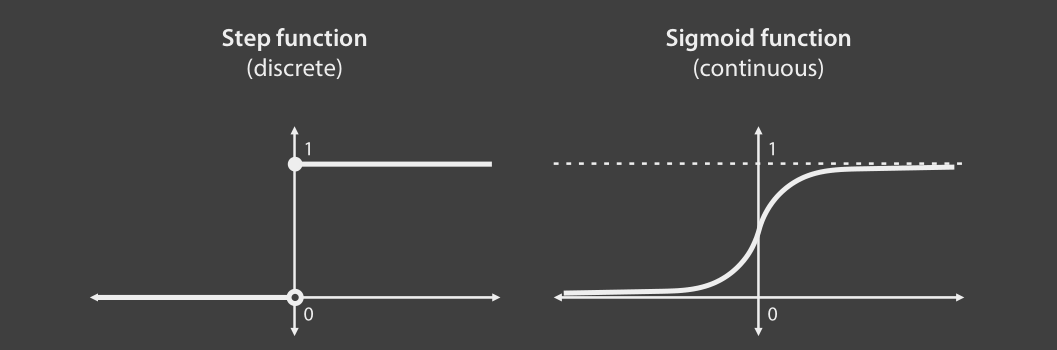

We use the logloss `log loss = –y ln(yˆ) – (1 – y) ln(1 – yˆ)` as error function, where `y` is the label and `yˆ` the predicted result.

The process is similar to the process of training a linear regression model or a perceptron classifier and consists of the following steps:

• Start with a random logistic classifier.

• Repeat many times:
– Slightly improve the classifier.

• Measure the log loss to decide when to stop running the loop.

In [35]:
import numpy as np
import random
import matplotlib
from matplotlib import pyplot
from matplotlib import pyplot as plt

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

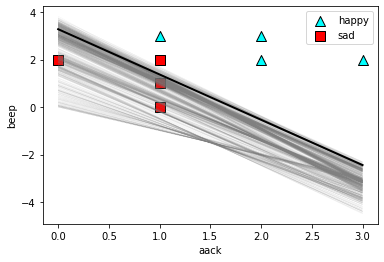

([0.8544551796281455, 0.4476521069458652], -1.4698750377276848)

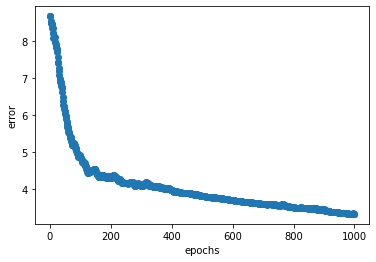

In [36]:
def sigmoid(x):
  return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
  return np.dot(weights, features) + bias

def prediction(weights, bias, features):
  return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
  pred = prediction(weights, bias, features)
  return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)):
    total_error += log_loss(weights, bias, features[i], labels[i])
  return total_error

def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias


logistic_regression_algorithm(features, labels)


---
Classifying into multiple classes: The softmax function

If we want to find a continuous classifier for multiple `n` categories, we build `n` classifier and the probability that our item belongs to each class is found using softmax as defined below. 

If we have n classifiers that output the n scores a1, a2, … ,
an, the probabilities obtained are p1, p2, … , pn, where

\begin{align} 
  \text{Softmax}(p_{i}) = \frac{ \exp(a_i) }{ \sum_j \exp(a_j) }
\end{align}
